<a href="https://colab.research.google.com/github/aryan-at-ul/vision_related_projects/blob/main/getting_critical_points_post_resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ddpm-proteins

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 46.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 MB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 58.9 MB/s eta 0:00:00
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 49.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openmm: filename=openmm-0.2-py3-none-any.whl size=61166 sha256=19a29e448d813884bd6d71a8704c14888a52edc74ee8fbe78fbfa15344d67694
  Stored in directory: /root/.cache/pip/wheels/7b/38/69/107dcff07bcbf69542be3a2df57e62966655d78352c3d05757
Successfully built openmm


In [ ]:
!pip install openmm

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


transform = transforms.Compose([
    # transforms.RandomCrop(32, padding=8),
    # transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=2)



classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


# transform = transforms.Compose([
#     transforms.Pad(2),  # Add padding of 2 on each side to increase image size from 28x28 to 32x32, error in attention mlp for channel 1?????
#     transforms.ToTensor()
#     # transforms.Lambda(lambda x: x.repeat(3, 1, 1)),
#     # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])


# trainset = torchvision.datasets.MNIST(root='./data', train=True,
#                                       download=True, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
#                                           shuffle=True, num_workers=2)


# testset = torchvision.datasets.MNIST(root='./data', train=False,
#                                      download=True, transform=transform)
# testloader = torch.utils.data.DataLoader(testset, batch_size=128,
#                                          shuffle=False, num_workers=2)


100%|██████████| 170498071/170498071 [00:02<00:00, 72827869.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
!pip install torchsr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.2 MB/s eta 0:00:00


Downloading: "https://github.com/Coloquinte/torchSR/releases/download/v1.0.3/edsr_x2.pt" to /root/.cache/torch/hub/checkpoints/edsr_x2.pt
100%|██████████| 155M/155M [00:00<00:00, 221MB/s]
<ipython-input-3-43d89a7e6748>:45: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  sr_resized = sr.resize((32, 32), Image.ANTIALIAS)


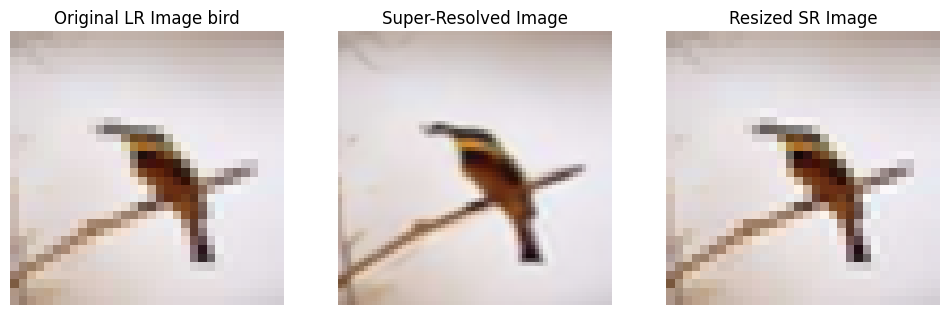

In [3]:
from torchsr.datasets import Div2K
from torchsr.models import ninasr_b0
from torchvision.transforms.functional import to_pil_image, to_tensor
import random
import matplotlib.pyplot as plt
from torchsr.models import edsr, rcan
from torchsr.models.utils import ChoppedModel, SelfEnsembleModel
from torchsr.transforms import ColorJitter, Compose, RandomCrop
from PIL import Image



device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Choose a random index
random_index = random.randint(0, len(testset) - 1)
random_index = torch.randint(len(trainset), (1,)).item()
random_image, label = trainset[random_index]
random_tensor = random_image
# Reverse the normalization
mean = torch.tensor([0.4914, 0.4822, 0.4465])
std = torch.tensor([0.2023, 0.1994, 0.2010])
random_image.mul_(std[:, None, None]).add_(mean[:, None, None])  # In-place operation

# Assuming random_image is in RGB format, convert to PIL image
random_image = transforms.ToPILImage()(random_image)

lr = random_tensor

# Fetch the image and label using the random index
# lr, label = testset[random_index]

# model = ninasr_b0(scale=2, pretrained=True).to(device)
model = SelfEnsembleModel(edsr(scale=2, pretrained=True)).to(device)
# model = ChoppedModel(
#     rcan(scale=2, pretrained=True), scale=2,
#     chop_size=1, chop_overlap=0).to(device)
lr_pil = to_pil_image(lr)

# Apply the model to get the super-resolved image
lr_t = lr.unsqueeze(0).to(device)
sr_t = model(lr_t)
sr = to_pil_image(sr_t.squeeze(0).detach().cpu())

# Resize the super-resolved image
sr_resized = sr.resize((32, 32), Image.ANTIALIAS)

# Plot all three images in one figure
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Original low-resolution image
axs[0].imshow(lr_pil)
axs[0].set_title(f"Original LR Image {classes[label]}")
axs[0].axis('off')

# Super-resolved image
axs[1].imshow(sr)
axs[1].set_title("Super-Resolved Image")
axs[1].axis('off')

# Resized super-resolved image
axs[2].imshow(sr_resized)
axs[2].set_title("Resized SR Image")
axs[2].axis('off')
plt.show()


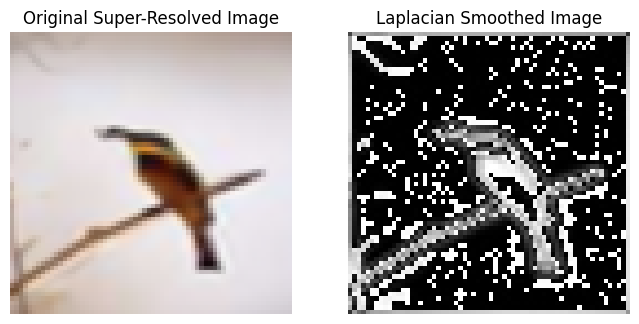

In [4]:
import torch
import torch.nn.functional as F
from torchvision.transforms.functional import to_tensor, to_pil_image
import matplotlib.pyplot as plt

# Assuming sr_t is the output tensor from the model

# Convert to PIL for visualization and then back to tensor
sr = to_pil_image(sr_t.squeeze(0).detach().cpu())
sr_tensor = to_tensor(sr).unsqueeze(0)

# Convert to grayscale
gray_sr_tensor = sr_tensor.mean(dim=1, keepdim=True)

# Define a Laplacian kernel
laplacian_kernel = torch.tensor([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=torch.float32)
laplacian_kernel = laplacian_kernel.view(1, 1, 3, 3)

# Apply the kernel to the grayscale image
smoothed_sr_tensor = F.conv2d(gray_sr_tensor, laplacian_kernel, padding=1)

# Convert back to PIL image for visualization
smoothed_sr = to_pil_image(smoothed_sr_tensor.squeeze(0).detach().cpu())

# Visualize the original and smoothed images
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Original Super-resolved image
axs[0].imshow(sr)
axs[0].set_title("Original Super-Resolved Image")
axs[0].axis('off')

# Smoothed image
axs[1].imshow(smoothed_sr, cmap='gray')
axs[1].set_title("Laplacian Smoothed Image")
axs[1].axis('off')

plt.show()


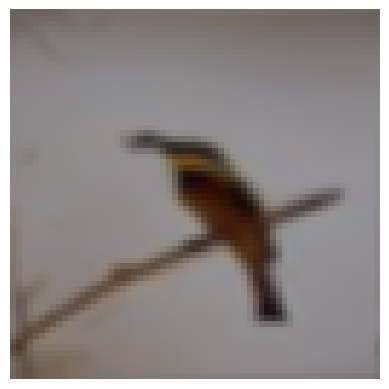

In [5]:
import numpy as np
from PIL import Image
from scipy.signal import convolve2d

def smoothing_kernel_poly6(dst, radius):
    if dst < radius:
        v = radius**2 - dst**2
        poly6_scaling_factor = 315 / (64 * np.pi * radius**9)  # Assuming 3D kernel
        return v**3 * poly6_scaling_factor
    return 0

def create_poly6_kernel(radius):
    # Create a 2D grid of distances from the center
    size = radius*2 + 1
    kernel = np.zeros((size, size), dtype=np.float32)
    for i in range(size):
        for j in range(size):
            dist = np.sqrt((radius - i)**2 + (radius - j)**2)
            kernel[i, j] = smoothing_kernel_poly6(dist, radius)
    return kernel

# Example usage
radius = 2  # Adjust the radius as needed
poly6_kernel = create_poly6_kernel(radius)

# Convert the PIL image to a numpy array
sr_array = np.array(sr)

# Apply the kernel to each channel of the image
smoothed_sr = np.zeros_like(sr_array)
for i in range(3):  # Assuming a 3-channel RGB image
    smoothed_sr[..., i] = convolve2d(sr_array[..., i], poly6_kernel, mode='same', boundary='wrap')

# Convert back to PIL image for visualization
smoothed_sr_image = Image.fromarray(np.uint8(smoothed_sr))

# Visualize the original and smoothed images
plt.imshow(smoothed_sr_image)
plt.axis('off')
plt.show()


<ipython-input-7-e1dce6610235>:54: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_img = np.int0(corners_img)
<ipython-input-7-e1dce6610235>:71: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  sr_resized = sr.resize((32, 32), Image.ANTIALIAS)


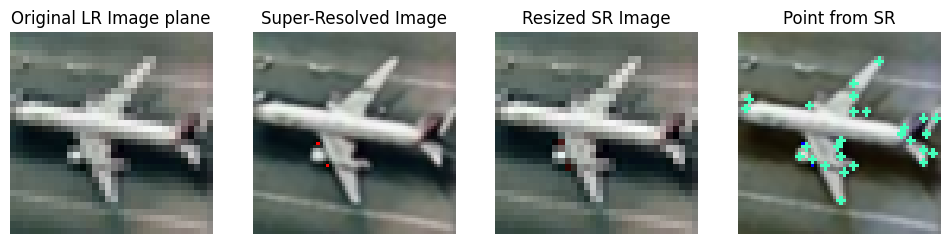

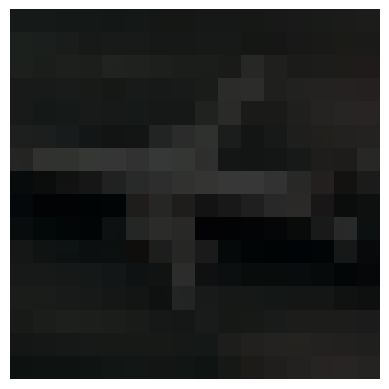

In [7]:
from torchsr.datasets import Div2K
from torchsr.models import ninasr_b0
from torchvision.transforms.functional import to_pil_image, to_tensor
import random
import matplotlib.pyplot as plt
from torchsr.models import edsr, rcan
from torchsr.models.utils import ChoppedModel, SelfEnsembleModel
from torchsr.transforms import ColorJitter, Compose, RandomCrop
from PIL import Image
import cv2
import numpy as np
from skimage import data
import matplotlib.pyplot as plt


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Choose a random index
random_index = random.randint(0, len(testset) - 1)
random_index = torch.randint(len(trainset), (1,)).item()
random_image, label = trainset[random_index]
random_tensor = random_image
# Reverse the normalization
mean = torch.tensor([0.4914, 0.4822, 0.4465])
std = torch.tensor([0.2023, 0.1994, 0.2010])
random_image.mul_(std[:, None, None]).add_(mean[:, None, None])  # In-place operation

# Assuming random_image is in RGB format, convert to PIL image
random_image = transforms.ToPILImage()(random_image)

lr = random_tensor


# model = ninasr_b0(scale=2, pretrained=True).to(device)
model = SelfEnsembleModel(edsr(scale=2, pretrained=True)).to(device)
# model = ChoppedModel(
#     rcan(scale=2, pretrained=True), scale=2,
#     chop_size=1, chop_overlap=0).to(device)
lr_pil = to_pil_image(lr)



def shi_tomasi(image):

    image_np = np.array(image)

    # Convert RGB to BGR if the image is a color image
    if len(image_np.shape) == 3 and image_np.shape[2] == 3:
        image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

    # Convert to grayscale
    gray_img = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)
    # gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    corners_img = cv2.goodFeaturesToTrack(gray_img, 1000, 0.1, 0.1)
    corners_img = np.int0(corners_img)
    for corners in corners_img:
        x, y = corners.ravel()
        cv2.circle(image_np, (x, y), 1, [69, 255, 188], -1)
    return image_np




# Apply the model to get the super-resolved image
lr_t = lr.unsqueeze(0).to(device)
sr_t = model(lr_t)
sr = to_pil_image(sr_t.squeeze(0).detach().cpu())

sht_img = shi_tomasi(sr)

# Resize the super-resolved image
sr_resized = sr.resize((32, 32), Image.ANTIALIAS)

# Plot all three images in one figure
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

# Original low-resolution image
axs[0].imshow(lr_pil)
axs[0].set_title(f"Original LR Image {classes[label]}")
axs[0].axis('off')

# Super-resolved image
axs[1].imshow(sr)
axs[1].set_title("Super-Resolved Image")
axs[1].axis('off')

# Resized super-resolved image
axs[2].imshow(sr_resized)
axs[2].set_title("Resized SR Image")
axs[2].axis('off')

axs[3].imshow(sht_img)
axs[3].set_title("Point from SR")
axs[3].axis('off')

plt.show()


import numpy as np
from PIL import Image
from scipy.signal import convolve2d

# Poly6 smoothing kernel function
def smoothing_kernel_poly6(dst, radius):
    if dst < radius:
        v = radius**2 - dst**2
        poly6_scaling_factor = 315 / (64 * np.pi * radius**9)
        return v**3 * poly6_scaling_factor
    return 0

# Create Poly6 kernel
def create_poly6_kernel(radius):
    size = radius*2 + 1
    kernel = np.zeros((size, size), dtype=np.float32)
    for i in range(size):
        for j in range(size):
            dist = np.sqrt((radius - i)**2 + (radius - j)**2)
            kernel[i, j] = smoothing_kernel_poly6(dist, radius)
    return kernel

# Apply smoothing to patches of the image
def apply_smoothing_to_patches(image_array, kernel, patch_size):
    smoothed_image = np.zeros_like(image_array)
    for i in range(0, image_array.shape[0], patch_size):
        for j in range(0, image_array.shape[1], patch_size):
            patch = image_array[i:i+patch_size, j:j+patch_size]
            smoothed_patch = convolve2d(patch, kernel, mode='same', boundary='wrap')
            smoothed_image[i:i+patch_size, j:j+patch_size] = smoothed_patch
    return smoothed_image





# Parameters
radius = 5
patch_size = 4
poly6_kernel = create_poly6_kernel(radius)

sr_array = np.array(sr)

smoothed_sr_array = np.zeros_like(sr_array)
for i in range(3):
    smoothed_sr_array[..., i] = apply_smoothing_to_patches(sr_array[..., i], poly6_kernel, patch_size)


smoothed_sr_image = Image.fromarray(np.uint8(smoothed_sr_array))


plt.imshow(smoothed_sr_image)
plt.axis('off')
plt.show()


<ipython-input-27-29b7352104e6>:1: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt as bwdist
<ipython-input-27-29b7352104e6>:38: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners_img = np.int0(corners_img)


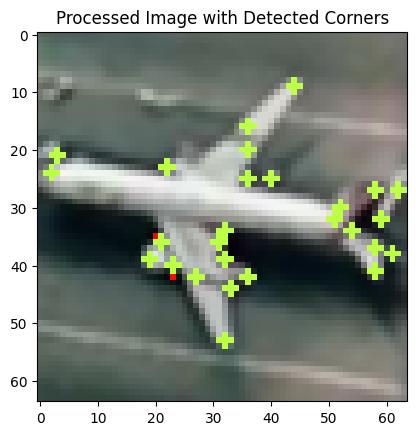

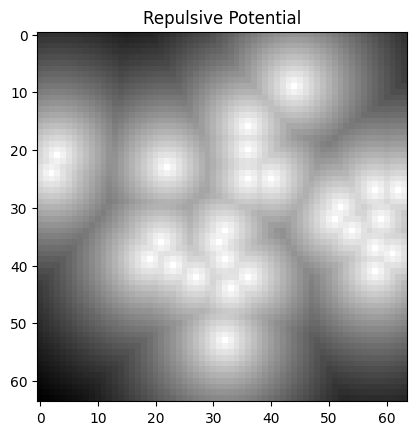

In [27]:
from scipy.ndimage.morphology import distance_transform_edt as bwdist


# def shi_tomasi_corrected(image):
#     image_np = np.array(image)

#     # Convert RGB to BGR for OpenCV processing
#     if len(image_np.shape) == 3 and image_np.shape[2] == 3:
#         image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

#     # Convert to grayscale
#     gray_img = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)

#     # Detect corners
#     corners_img = cv2.goodFeaturesToTrack(gray_img, 1000, 0.1, 10)
#     corners_img = np.int0(corners_img)
#     for corners in corners_img:
#         x, y = corners.ravel()
#         cv2.circle(image_np, (x, y), 1, [69, 255, 188], -1)

#     return image_np, corners_img, gray_img
def shi_tomasi_corrected(image):
    image_np = np.array(image)


    if len(image_np.shape) == 3 and image_np.shape[2] == 3:
        image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)
    gray_img = cv2.cvtColor(image_np, cv2.COLOR_BGR2GRAY)


    maxCorners = 5000  # number of corners to detect
    qualityLevel = 0.1  #  level to detect more corners
    minDistance = 1  # minimum distance between corners

    corners_img = cv2.goodFeaturesToTrack(gray_img, maxCorners, qualityLevel, minDistance)
    corners_img = np.int0(corners_img)
    for corners in corners_img:
        x, y = corners.ravel()
        cv2.circle(image_np, (x, y), 1, [69, 255, 188], -1)

    return image_np, corners_img, gray_img



processed_image, corners, gray_img = shi_tomasi_corrected(sr)


processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)


plt.imshow(processed_image_rgb)
plt.title('Processed Image with Detected Corners')
plt.show()


obstacle = np.zeros_like(gray_img)
for corner in corners:
    x, y = corner.ravel()
    obstacle[y, x] = 1


d = bwdist(obstacle == 0)


d2 = (d / 100.) + 1
d0 = 2
nu = 800
repulsive = nu * ((1. / d2 - 1 / d0) ** 2)
repulsive[d2 > d0] = 0

plt.imshow(repulsive, cmap='gray')
plt.title('Repulsive Potential')
plt.show()

image = sr

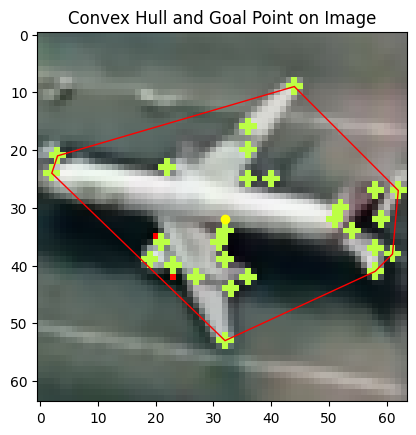

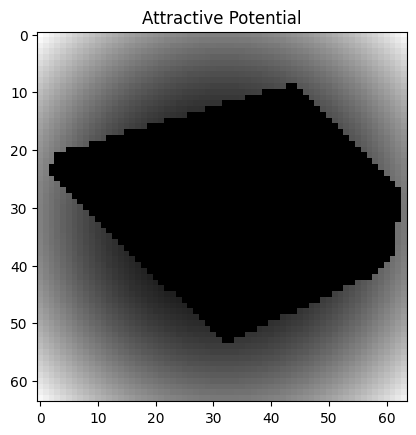

In [28]:
from scipy.spatial import ConvexHull

goal = [image.width // 2, image.height // 2]


corner_points = [corner.ravel() for corner in corners]

# stupid method, do something ??????? all corner must be in path then sample as many points as needed
hull = ConvexHull(corner_points)
hull_path = plt.Polygon([corner_points[vertex] for vertex in hull.vertices], fill=None, edgecolor='r')


xx, yy = np.meshgrid(range(image.width), range(image.height))


attractive = np.zeros_like(xx, dtype=float)

xi = 1 / 700.
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        if not hull_path.contains_point((j, i)):  # Check if point is outside the convex hull
            attractive[i, j] = xi * ((j - goal[0]) ** 2 + (i - goal[1]) ** 2)


plt.imshow(processed_image_rgb)
plt.gca().add_patch(hull_path)
plt.scatter([goal[0]], [goal[1]], color='yellow')
plt.title('Convex Hull and Goal Point on Image')
plt.show()


plt.imshow(attractive, cmap='gray')
plt.title('Attractive Potential')
plt.show()

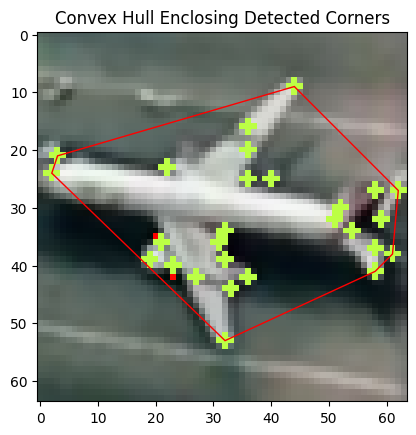

In [32]:
corner_points = [corner.ravel() for corner in corners]


hull_with_corner_points = ConvexHull(corner_points)
hull_path_with_corner_points = plt.Polygon([corner_points[vertex] for vertex in hull_with_corner_points.vertices], fill=None, edgecolor='r')

plt.imshow(processed_image_rgb)
plt.gca().add_patch(hull_path_with_corner_points)
plt.title('Convex Hull Enclosing Detected Corners')
plt.show()

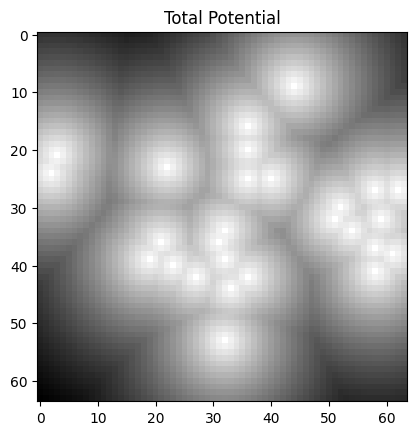

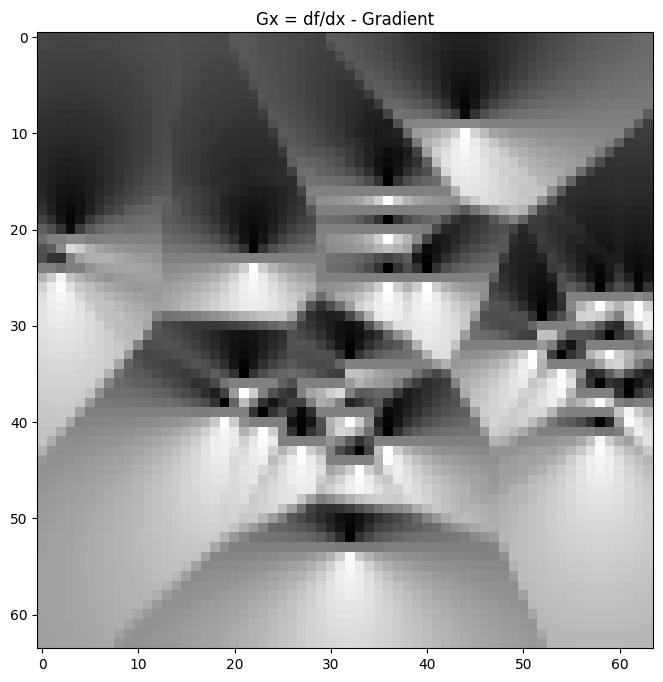

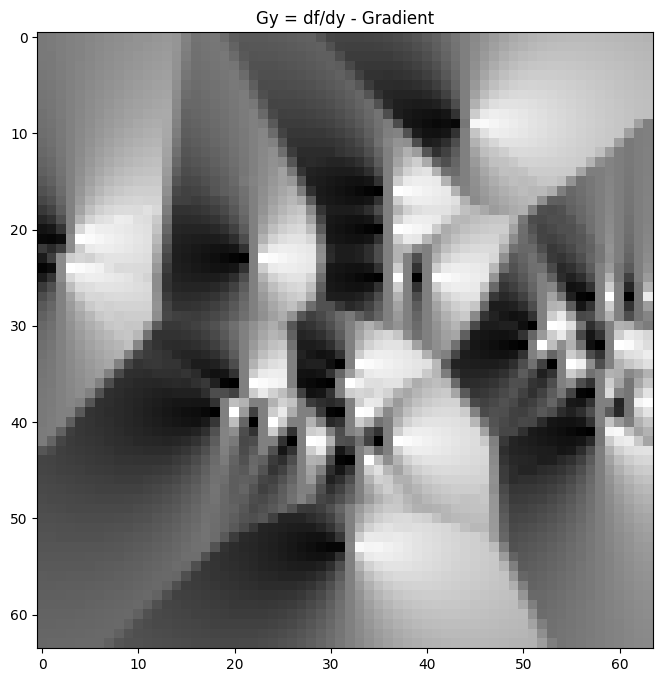

In [29]:
f = attractive + repulsive

# Display total potential
plt.imshow(f, cmap='gray')
plt.title('Total Potential')
plt.show()


gx, gy = np.gradient(-f)


plt.figure(figsize=(12, 8))
plt.imshow(gx, cmap='gray')
plt.title('Gx = df/dx - Gradient')
plt.show()


plt.figure(figsize=(12, 8))
plt.imshow(gy, cmap='gray')
plt.title('Gy = df/dy - Gradient')
plt.show()

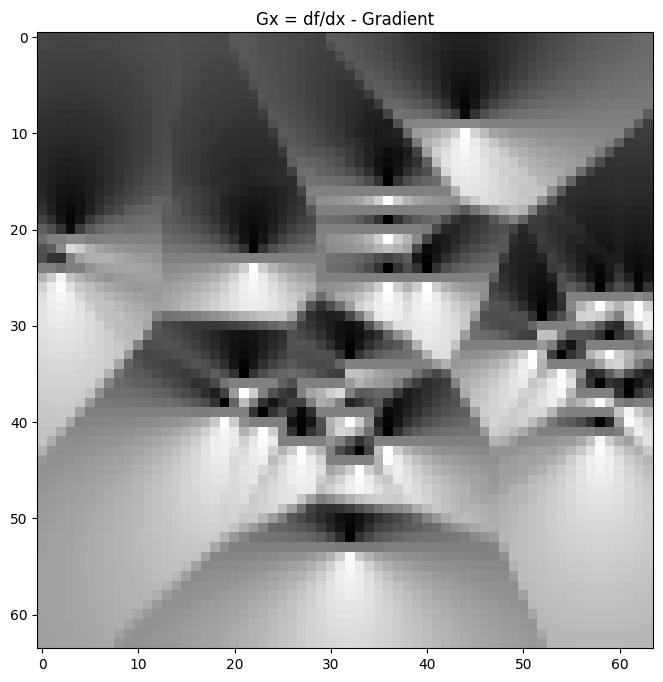

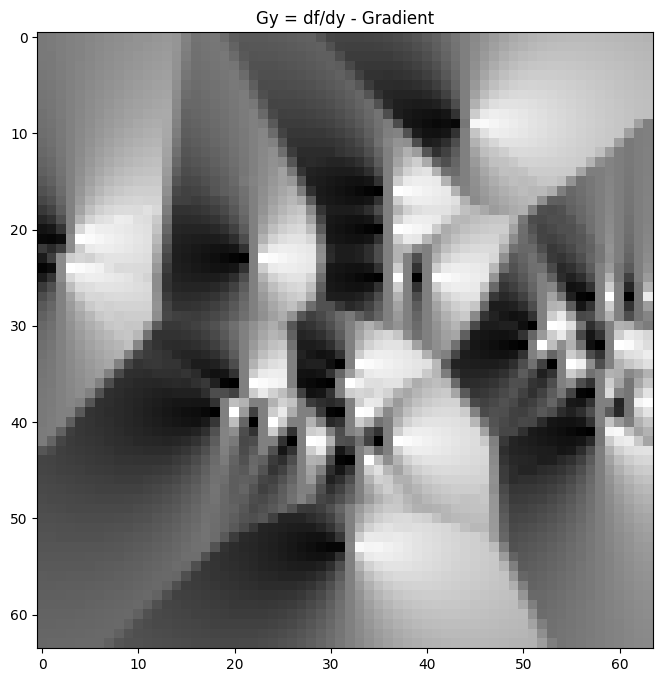

In [30]:
gx, gy = np.gradient(-f)


plt.figure(figsize=(12, 8))
plt.imshow(gx, cmap='gray')
plt.title('Gx = df/dx - Gradient')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(gy, cmap='gray')
plt.title('Gy = df/dy - Gradient')
plt.show()

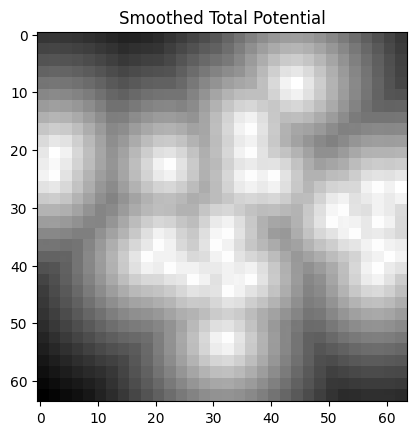

In [38]:
from scipy.signal import convolve2d

# Define the smoothing kernel using Poly6
def smoothing_kernel_poly6(dst, radius):
    if dst < radius:
        v = radius**2 - dst**2
        poly6_scaling_factor = 315 / (64 * np.pi * radius**9)
        return v**3 * poly6_scaling_factor
    return 0

# Create Poly6 kernel
def create_poly6_kernel(radius):
    size = radius*2 + 1
    kernel = np.zeros((size, size), dtype=np.float32)
    for i in range(size):
        for j in range(size):
            dist = np.sqrt((radius - i)**2 + (radius - j)**2)
            kernel[i, j] = smoothing_kernel_poly6(dist, radius)
    return kernel

# Apply smoothing to patches of the image
def apply_smoothing_to_patches(image_array, kernel, patch_size):
    smoothed_image = np.zeros_like(image_array)
    for i in range(0, image_array.shape[0], patch_size):
        for j in range(0, image_array.shape[1], patch_size):
            patch = image_array[i:i+patch_size, j:j+patch_size]
            smoothed_patch = convolve2d(patch, kernel, mode='same', boundary='wrap')
            smoothed_image[i:i+patch_size, j:j+patch_size] = smoothed_patch
    return smoothed_image

# Parameters
radius = 5
patch_size = 2
poly6_kernel = create_poly6_kernel(radius)


smoothed_f = apply_smoothing_to_patches(f, poly6_kernel, patch_size)


plt.imshow(smoothed_f, cmap='gray')
plt.title('Smoothed Total Potential')
plt.show()

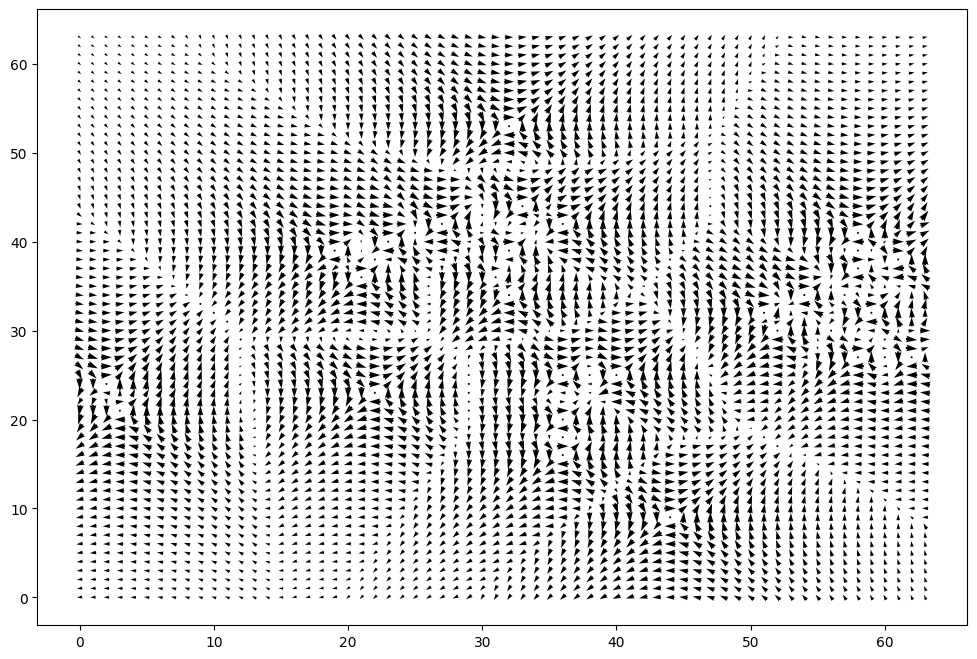

In [36]:
def gradient_plot(x, y, gx, gy, skip=10):
    plt.figure(figsize=(12, 8))
    Q = plt.quiver(x[::skip, ::skip], y[::skip, ::skip], gx[::skip, ::skip], gy[::skip, ::skip],
                   pivot='mid', units='inches')
    qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                       coordinates='figure')

ncols, nrows = f.shape
skip = 1

xidx = np.arange(0, ncols, skip)
yidx = np.arange(0, nrows, skip)
x, y = np.meshgrid(xidx, yidx)



gx_adjusted = gx[::skip, ::skip]
gy_adjusted = gy[::skip, ::skip]


gradient_plot(x, y, gx_adjusted, gy_adjusted, skip)

In [ ]:
import torch
import torch.optim as optim
from tqdm import tqdm
from ddpm_proteins import Unet, GaussianDiffusion

# Check if CUDA is available and set the device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Unet(
    dim = 32,
    dim_mults = (1, 2, 4, 8),
    channels = 1

)

diffusion = GaussianDiffusion(
    model.to(device),
    image_size =32,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)


diffusion = diffusion.to(device)

# Initialize the optimizer (e.g., Adam, SGD, etc.)
optimizer = optim.Adam(diffusion.parameters(), lr=0.0001)


num_epochs = 10

for epoch in range(num_epochs):

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader)):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)
        # print("input shape",inputs.shape)

        optimizer.zero_grad()
        loss = diffusion(inputs)
        loss.backward()

        # Update the weights
        optimizer.step() ## this code has optimizer instantiated in the unet part, not needed. calm down!

        running_loss += loss.item()
        if i % 300 == 299:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 300:.3f}')
            running_loss = 0.0

print('Training done')

  0%|          | 1/469 [00:30<3:54:53, 30.12s/it]


KeyboardInterrupt: 

sampling loop time step: 100%|██████████| 1000/1000 [00:29<00:00, 33.67it/s]


torch.Size([4, 3, 32, 32])


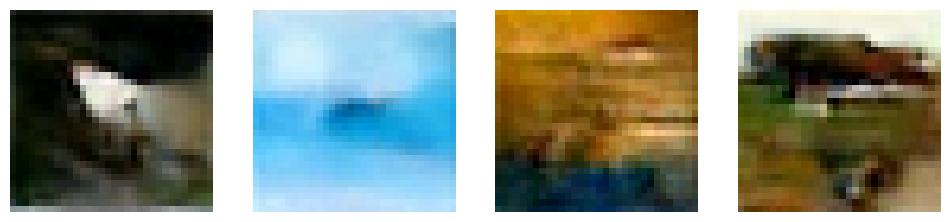

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np


# sampled_images = diffusion.sample(batch_size=4)
# print(sampled_images.shape) # Expected to be (4, 3, 128, 128)
# sampled_images = sampled_images.detach().cpu()


# def tensor_to_image(tensor):
#     tensor = tensor.numpy()
#     tensor = np.transpose(tensor, (1, 2, 0))
#     tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())
#     return tensor

# fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

# for i, ax in enumerate(axes.flat):
#     img = tensor_to_image(sampled_images[i])
#     ax.imshow(img)
#     ax.axis('off')

# plt.show()

import matplotlib.pyplot as plt
import numpy as np

# Flag to check if the dataset is MNIST
dataset = "mnist"

sampled_images = diffusion.sample(batch_size=4)
print(sampled_images.shape) # Expected to be (4, 3, 32, 32)
sampled_images = sampled_images.detach().cpu()

def tensor_to_image(tensor, is_mnist=False):
    if is_mnist:
        # Convert (3, 32, 32) back to (1, 28, 28)
        tensor = tensor.mean(dim=0, keepdim=True)  # Convert to grayscale by averaging channels
        tensor = tensor[0, 2:-2, 2:-2]  # Crop the image to 28x28
        tensor = tensor.unsqueeze(0)  # Add a channel dimension
    tensor = tensor.numpy()
    tensor = np.transpose(tensor, (1, 2, 0))
    tensor = (tensor - tensor.min()) / (tensor.max() - tensor.min())
    return tensor

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

for i, ax in enumerate(axes.flat):
    img = tensor_to_image(sampled_images[i], is_mnist=(dataset == "mnist"))
    ax.imshow(img.squeeze(), cmap='gray' if dataset == "mnist" else None)
    ax.axis('off')

plt.show()

